In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/martj42/international_results/master/results.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
afcon = df[df["tournament"] == "African Cup of Nations"].copy()
afcon["date"] = pd.to_datetime(afcon["date"])

In [13]:
afcon.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4396,1957-02-10,Sudan,Egypt,1,2,African Cup of Nations,Khartoum,Sudan,False
4397,1957-02-16,Egypt,Ethiopia,4,0,African Cup of Nations,Khartoum,Sudan,True
4864,1959-05-22,Egypt,Ethiopia,4,0,African Cup of Nations,Cairo,United Arab Republic,True
4867,1959-05-25,Ethiopia,Sudan,0,1,African Cup of Nations,Cairo,United Arab Republic,True
4870,1959-05-29,Egypt,Sudan,2,1,African Cup of Nations,Cairo,United Arab Republic,True


In [14]:
afcon = afcon[
    (afcon["date"].dt.year >= 2013) &
    (afcon["date"].dt.year <= 2024)   # CAN 2023 jouée en 2024
]

In [15]:
afcon.shape

(252, 9)

In [16]:
afcon['home_team'].unique()

array(['Angola', 'South Africa', 'Ghana', 'Mali', 'Nigeria', 'Zambia',
       'Ivory Coast', 'Tunisia', 'Morocco', 'Niger', 'Burkina Faso',
       'Algeria', 'Cape Verde', 'DR Congo', 'Ethiopia', 'Togo',
       'Equatorial Guinea', 'Gabon', 'Cameroon', 'Congo', 'Senegal',
       'Guinea', 'Egypt', 'Guinea-Bissau', 'Zimbabwe', 'Uganda',
       'Madagascar', 'Kenya', 'Mauritania', 'Benin', 'Burundi',
       'Tanzania', 'Namibia', 'Comoros', 'Sudan', 'Malawi', 'Gambia',
       'Sierra Leone', 'Mozambique'], dtype=object)

In [17]:
qualified = {
    'Morocco', 'Mali', 'Zambia', 'Comoros',
    'Egypt', 'South Africa', 'Angola', 'Zimbabwe',
    'Nigeria', 'Tunisia', 'Uganda', 'Tanzania',
    'Senegal', 'DR Congo', 'Benin', 'Botswana',
    'Algeria', 'Burkina Faso', 'Equatorial Guinea', 'Sudan',
    'Côte d’Ivoire', 'Cameroon', 'Gabon', 'Mozambique'
}


In [18]:
NAME_MAP = {
    "Ivory Coast": "Côte d’Ivoire",
    "Cote d'Ivoire": "Côte d’Ivoire",
    "Côte d'Ivoire": "Côte d’Ivoire",
    "Congo DR": "DR Congo",
    "DR Congo": "DR Congo",
    "South Africa": "South Africa",
    "Equatorial Guinea": "Equatorial Guinea",
}


In [19]:
def norm_team(name: str) -> str:
    name = str(name).strip()
    return NAME_MAP.get(name, name)

In [20]:

afcon["home_team_n"] = afcon["home_team"].map(norm_team)
afcon["away_team_n"] = afcon["away_team"].map(norm_team)

In [21]:
qualified_n = {norm_team(t) for t in qualified}

In [22]:
afcon_q = afcon[
    afcon["home_team_n"].isin(qualified_n) &
    afcon["away_team_n"].isin(qualified_n)
].copy()

In [23]:
afcon_q.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_n,away_team_n
36613,2013-01-19,Angola,Morocco,0,0,African Cup of Nations,Johannesburg,South Africa,True,Angola,Morocco
36621,2013-01-21,Nigeria,Burkina Faso,1,1,African Cup of Nations,Nelspruit,South Africa,True,Nigeria,Burkina Faso
36627,2013-01-22,Tunisia,Algeria,1,0,African Cup of Nations,Rustenburg,South Africa,True,Tunisia,Algeria
36629,2013-01-23,South Africa,Angola,2,0,African Cup of Nations,Durban,South Africa,False,South Africa,Angola
36638,2013-01-25,Zambia,Nigeria,1,1,African Cup of Nations,Nelspruit,South Africa,True,Zambia,Nigeria


In [26]:
afcon_q.shape

(130, 11)

In [27]:
afcon_q=afcon_q.drop(columns=['home_team_n','away_team_n'], axis=1)

In [29]:
import numpy as np

# df = ton dataframe (celui de l'historique CAN filtré)

afcon_q["vainqueur"] = np.select(
    [
        afcon_q["home_score"] > afcon_q["away_score"],
        afcon_q["home_score"] < afcon_q["away_score"],
        afcon_q["home_score"] == afcon_q["away_score"],
    ],
    [
        afcon_q["home_team"],   # home gagne
        afcon_q["away_team"],   # away gagne
        "Draw",            # match nul
    ],
    default="Draw"
)

In [31]:
afcon_q.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,vainqueur
36613,2013-01-19,Angola,Morocco,0,0,African Cup of Nations,Johannesburg,South Africa,True,Draw
36621,2013-01-21,Nigeria,Burkina Faso,1,1,African Cup of Nations,Nelspruit,South Africa,True,Draw
36627,2013-01-22,Tunisia,Algeria,1,0,African Cup of Nations,Rustenburg,South Africa,True,Tunisia
36629,2013-01-23,South Africa,Angola,2,0,African Cup of Nations,Durban,South Africa,False,South Africa
36638,2013-01-25,Zambia,Nigeria,1,1,African Cup of Nations,Nelspruit,South Africa,True,Draw


In [33]:
afcon_q=afcon_q.drop(columns=['home_score','away_score','city'], axis=1)

In [34]:
df=afcon_q

In [58]:
df.to_csv("historique_rencontre.csv", index=False)


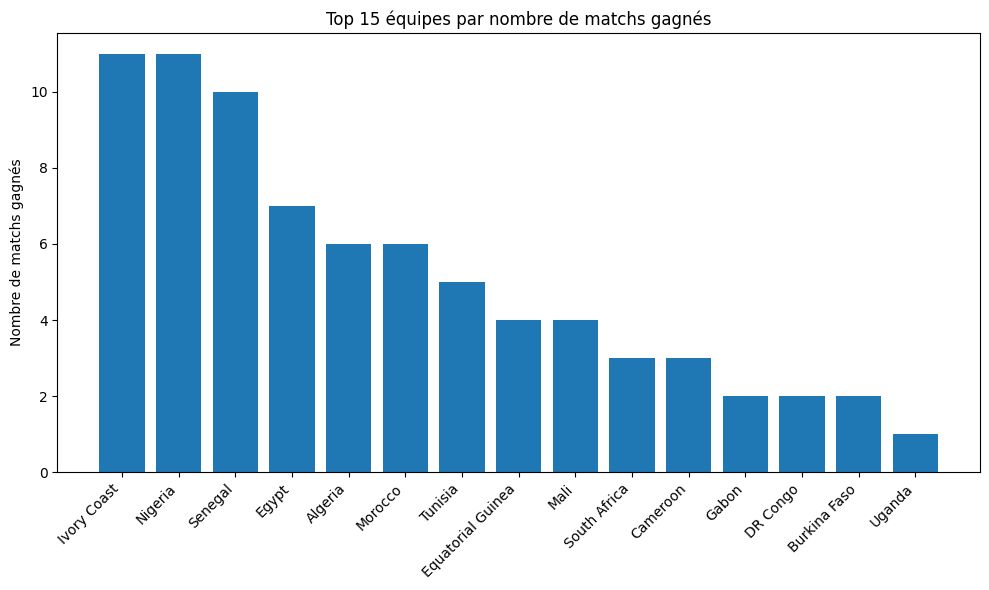

In [35]:
import matplotlib.pyplot as plt

# 1) Compter les victoires (exclure les nuls)
wins = df["vainqueur"].dropna()
wins = wins[wins != "Draw"]
wins_count = wins.value_counts()

# 2) Top N (optionnel)
N = 15
wins_top = wins_count.head(N)

# 3) Plot
plt.figure(figsize=(10, 6))
plt.bar(wins_top.index, wins_top.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Nombre de matchs gagnés")
plt.title(f"Top {N} équipes par nombre de matchs gagnés")
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
import numpy as np

# 1) Construire une colonne "edition" à partir des dates
def infer_edition(dt):
    y = dt.year
    # CAN 2021 jouée en 2022, CAN 2023 jouée en 2024
    if y == 2022: return 2021
    if y == 2024: return 2023
    return y

afcon = afcon.copy()
afcon["date"] = pd.to_datetime(afcon["date"])
afcon["edition"] = afcon["date"].apply(infer_edition)

# 2) Définir les tailles des rounds selon l'édition
ROUND_SIZES = {
    2013: {"QF": 4, "SF": 2, "F": 1},
    2015: {"QF": 4, "SF": 2, "F": 1},
    2017: {"QF": 4, "SF": 2, "F": 1},
    2021: {"QF": 4, "SF": 2, "F": 1},  # format 24 équipes mais KO standard; si ton dataset inclut R16, adapte ici
    2019: {"R16": 8, "QF": 4, "SF": 2, "F": 1},
    2023: {"R16": 8, "QF": 4, "SF": 2, "F": 1},
}

def stage_reached_for_edition(df_ed):
    ed = int(df_ed["edition"].iloc[0])
    sizes = ROUND_SIZES.get(ed)
    if sizes is None:
        raise ValueError(f"Edition non gérée: {ed}")

    df_ed = df_ed.sort_values("date").reset_index(drop=True)

    # Helper: récupérer équipes dans un sous-ensemble de matchs
    def teams_in(sub):
        return set(sub["home_team"]).union(set(sub["away_team"]))

    # Initialiser tout le monde à "Group"
    participants = teams_in(df_ed)
    stage = {t: "Group" for t in participants}

    # Extraire les matchs finaux depuis la fin
    idx_end = len(df_ed)

    # Finale (1 match)
    f = df_ed.iloc[idx_end - sizes["F"]: idx_end]
    idx_end -= sizes["F"]
    teams_f = teams_in(f)
    for t in teams_f:
        stage[t] = "Final"

    # Déterminer le champion via score de la finale (sans prolong/pénos explicites)
    # On prend vainqueur si pas nul; si nul, on laisse "Champion" à déterminer autrement
    if len(f) == 1:
        row = f.iloc[0]
        if row["home_score"] > row["away_score"]:
            stage[row["home_team"]] = "Champion"
        elif row["home_score"] < row["away_score"]:
            stage[row["away_team"]] = "Champion"

    # Demi (2 matchs)
    sf = df_ed.iloc[idx_end - sizes["SF"]: idx_end]
    idx_end -= sizes["SF"]
    teams_sf = teams_in(sf)
    for t in teams_sf:
        if stage[t] == "Group":
            stage[t] = "SF"

    # Quart (4 matchs)
    qf = df_ed.iloc[idx_end - sizes["QF"]: idx_end]
    idx_end -= sizes["QF"]
    teams_qf = teams_in(qf)
    for t in teams_qf:
        if stage[t] == "Group":
            stage[t] = "QF"

    # Huitièmes (si existe)
    if "R16" in sizes:
        r16 = df_ed.iloc[idx_end - sizes["R16"]: idx_end]
        teams_r16 = teams_in(r16)
        for t in teams_r16:
            if stage[t] == "Group":
                stage[t] = "R16"

    out = pd.DataFrame({"edition": ed, "team": list(stage.keys()), "stage_reached": list(stage.values())})
    return out

hist = afcon.groupby("edition", group_keys=False).apply(stage_reached_for_edition).reset_index(drop=True)

# Exemple: parcours de l’Algérie
hist[hist["team"] == "Algeria"].sort_values("edition")


C:\Users\NITRO\AppData\Local\Temp\ipykernel_133628\3120174416.py:88: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hist = afcon.groupby("edition", group_keys=False).apply(stage_reached_for_edition).reset_index(drop=True)


,edition,team,stage_reached
8,2013,Algeria,Group
25,2015,Algeria,QF
41,2017,Algeria,Group
66,2019,Algeria,Champion
91,2021,Algeria,Group
113,2023,Algeria,Group


In [55]:
hist.head()

,edition,team,stage_reached
0,2013,South Africa,QF
1,2013,Cape Verde,Group
2,2013,Zambia,Group
3,2013,Ethiopia,Group
4,2013,Ghana,SF


In [56]:
HOST_BY_EDITION = {
    2013: "South Africa",
    2015: "Equatorial Guinea",
    2017: "Gabon",
    2019: "Egypt",
    2021: "Cameroon",
    2023: "Ivory Coast",
}

hist["host_country"] = hist["edition"].map(HOST_BY_EDITION)


In [59]:
hist.to_csv("palmares.csv", index=False)
